In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import linear_model

In [2]:
#Goal: To create a predictive model using Forbes data from 2013, 2015, 2017, 2020, 2021, and 2023 to see what companies will most likely be in the top 10 in 2024, 2025, and 2026

In [3]:
#Initialize all datasets
df_global_2000_2013 = pd.read_csv("/Users/eshan/Downloads/ForbesTop2000DataSets/forbes2013.csv")
df_global_2000_2015 = pd.read_csv("/Users/eshan/Downloads/ForbesTop2000DataSets/Forbes2015.csv")
df_global_2000_2017 = pd.read_csv("/Users/eshan/Downloads/ForbesTop2000DataSets/Forbes Top2000 2017.csv")
df_global_2000_2020 = pd.read_csv("/Users/eshan/Downloads/ForbesTop2000DataSets/forbes_top_2000_world_largest_public_companies.csv")
df_global_2000_2021 = pd.read_csv("/Users/eshan/Downloads/ForbesTop2000DataSets/fortune_2000_in_2021.csv")
df_global_2000_2023 = pd.read_csv("/Users/eshan/Downloads/ForbesTop2000DataSets/forbes_the_global_2000_2023update.csv")

In [4]:
#Cleaning up all datasets to order by Rank and make all Ranks capitalized
df_global_2000_2013 = df_global_2000_2013.sort_values(by = 'Rank') 
df_global_2000_2013

,Rank,Company,Sales($billion),Profits($billion),Assets,Market Value,Country
182,1,ICBC,134.8,37.8,2813.5,237.3,China
183,2,China Construction Bank,113.1,30.6,2241.0,202.0,China
1031,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,United States
1032,4,General Electric,147.4,13.6,685.3,243.7,United States
1033,5,Exxon Mobil,420.7,44.9,333.8,400.4,United States
...,...,...,...,...,...,...,...
1982,1996,San-Ai Oil,0.5,0.1,25.7,0.5,Japan
666,1996,UOL Group,0.9,0.7,7.8,4.2,Singapore
322,1998,Interconexion Electrica,2.4,0.2,14.6,5.8,Colombia
1565,1999,Old Republic International,5.0,-0.1,16.2,3.3,United States


In [5]:
df_global_2000_2015 = df_global_2000_2015.sort_values(by = 'Rank')
df_global_2000_2015

,Company,Sector,Industry,Continent,Country,Market Value,Sales,Profits,Assets,Rank,Forbes Webpage
159,ICBC,Financials,Major Banks,Asia,China,215.6,148.7,42.7,3124.9,1,http://www.forbes.com/companies/icbc/
160,China Construction Bank,Financials,Regional Banks,Asia,China,174.4,121.3,34.2,2449.5,2,http://www.forbes.com/companies/china-construc...
161,Agricultural Bank of China,Financials,Regional Banks,Asia,China,141.1,136.4,27.0,2405.4,3,http://www.forbes.com/companies/agricultural-b...
1433,JPMorgan Chase,Financials,Major Banks,North America,United States,229.7,105.7,17.3,2435.3,4,http://www.forbes.com/companies/jpmorgan-chase/
1434,Berkshire Hathaway,Financials,Investment Services,North America,United States,309.1,178.8,19.5,493.4,5,http://www.forbes.com/companies/berkshire-hath...
...,...,...,...,...,...,...,...,...,...,...,...
149,Cameco,Materials,Diversified Metals & Mining,North America,Canada,9.5,2.4,0.3,7.6,1996,http://www.forbes.com/companies/cameco/
929,BMCE Bank,Financials,Regional Banks,Africa,Morocco,4.6,1.5,0.1,26.3,1997,http://www.forbes.com/companies/bmce-banque-ma...
1994,Synovus Financial,Financials,Regional Banks,North America,United States,3.4,1.2,0.2,26.2,1998,http://www.forbes.com/companies/synovus-financ...
875,UNY Group Holdings,Consumer Discretionary,Specialty Stores,Asia,Japan,1.4,10.7,0.1,8.8,1999,http://www.forbes.com/companies/uny-group-hold...


In [6]:
column_to_move = df_global_2000_2015.pop('Rank')
df_global_2000_2015.insert(0, 'Rank', column_to_move)
df_global_2000_2015

,Rank,Company,Sector,Industry,Continent,Country,Market Value,Sales,Profits,Assets,Forbes Webpage
159,1,ICBC,Financials,Major Banks,Asia,China,215.6,148.7,42.7,3124.9,http://www.forbes.com/companies/icbc/
160,2,China Construction Bank,Financials,Regional Banks,Asia,China,174.4,121.3,34.2,2449.5,http://www.forbes.com/companies/china-construc...
161,3,Agricultural Bank of China,Financials,Regional Banks,Asia,China,141.1,136.4,27.0,2405.4,http://www.forbes.com/companies/agricultural-b...
1433,4,JPMorgan Chase,Financials,Major Banks,North America,United States,229.7,105.7,17.3,2435.3,http://www.forbes.com/companies/jpmorgan-chase/
1434,5,Berkshire Hathaway,Financials,Investment Services,North America,United States,309.1,178.8,19.5,493.4,http://www.forbes.com/companies/berkshire-hath...
...,...,...,...,...,...,...,...,...,...,...,...
149,1996,Cameco,Materials,Diversified Metals & Mining,North America,Canada,9.5,2.4,0.3,7.6,http://www.forbes.com/companies/cameco/
929,1997,BMCE Bank,Financials,Regional Banks,Africa,Morocco,4.6,1.5,0.1,26.3,http://www.forbes.com/companies/bmce-banque-ma...
1994,1998,Synovus Financial,Financials,Regional Banks,North America,United States,3.4,1.2,0.2,26.2,http://www.forbes.com/companies/synovus-financ...
875,1999,UNY Group Holdings,Consumer Discretionary,Specialty Stores,Asia,Japan,1.4,10.7,0.1,8.8,http://www.forbes.com/companies/uny-group-hold...


In [7]:
df_global_2000_2017 = df_global_2000_2017.drop("Unnamed: 0", axis = 1)
df_global_2000_2017

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.400,42.000,3473.2,229.800,Financials,Major Banks
1,2,China Construction Bank,China,134.200,35.000,3016.6,200.500,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.900,24.100,620.9,409.900,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.500,24.200,2513.0,306.600,Financials,Major Banks
4,5,Wells Fargo,United States,97.600,21.900,1943.4,274.400,Financials,Major Banks
...,...,...,...,...,...,...,...,...,...
1995,1996,BEKB-BCBE,Switzerland,0.555,0.131,27.9,1.700,Financials,Regional Banks
1996,1997,Fastighets Balder,Sweden,0.630,0.639,10.2,3.800,Materials,NaN
1997,1998,Akamai Technologies,United States,2.300,0.316,4.4,10.100,Information Technology,Computer Services
1998,1999,Oita Bank,Japan,0.523,0.071,27.9,0.595,Financials,Regional Banks


In [8]:
df_global_2000_2020['rank'] = df_global_2000_2020['rank'].str.replace('#', '')
df_global_2000_2020

,rank,company,contry/territory,sales,profits,assets,market_value
0,1,ICBC,China,$177.2 B,$45.3 B,"$4,322.5 B",$242.3 B
1,2,China Construction Bank,China,$162.1 B,$38.9 B,"$3,822 B",$203.8 B
2,3,JPMorgan Chase,United States,$142.9 B,$30 B,"$3,139.4 B",$291.7 B
3,4,Berkshire Hathaway,United States,$254.6 B,$81.4 B,$817.7 B,$455.4 B
4,5,Agricultural Bank of China,China,$148.7 B,$30.9 B,"$3,697.5 B",$147.2 B
...,...,...,...,...,...,...,...
1995,1995,Founder Securities,China,$1.4 B,$115 M,$18.6 B,$8.3 B
1996,1995,Merlin Properties SOCIMI S.A,Spain,$594 M,$631 M,$14.9 B,$4.3 B
1997,1998,Heico,United States,$2.1 B,$371 M,$3.1 B,$11.8 B
1998,1999,W.P. Carey,United States,$1.2 B,$305 M,$14.1 B,$11.3 B


In [9]:
df_global_2000_2020.rename(columns={'rank': 'Rank'}, inplace=True)
df_global_2000_2020

,Rank,company,contry/territory,sales,profits,assets,market_value
0,1,ICBC,China,$177.2 B,$45.3 B,"$4,322.5 B",$242.3 B
1,2,China Construction Bank,China,$162.1 B,$38.9 B,"$3,822 B",$203.8 B
2,3,JPMorgan Chase,United States,$142.9 B,$30 B,"$3,139.4 B",$291.7 B
3,4,Berkshire Hathaway,United States,$254.6 B,$81.4 B,$817.7 B,$455.4 B
4,5,Agricultural Bank of China,China,$148.7 B,$30.9 B,"$3,697.5 B",$147.2 B
...,...,...,...,...,...,...,...
1995,1995,Founder Securities,China,$1.4 B,$115 M,$18.6 B,$8.3 B
1996,1995,Merlin Properties SOCIMI S.A,Spain,$594 M,$631 M,$14.9 B,$4.3 B
1997,1998,Heico,United States,$2.1 B,$371 M,$3.1 B,$11.8 B
1998,1999,W.P. Carey,United States,$1.2 B,$305 M,$14.1 B,$11.3 B


In [10]:
df_global_2000_2023.rename(columns={'rank': 'Rank'}, inplace=True)
df_global_2000_2023

,Rank,company,country,sales,profit,asset,market_value,publish_year
0,1,JPMorgan Chase,United States,179930.0,41800.0,3744300.0,399590.0,2023
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470.0,156360.0,660990.0,2055220.0,2023
2,3,ICBC,China,216770.0,52470.0,6116820.0,203010.0,2023
3,4,China Construction Bank,China,203080.0,48250.0,4977480.0,172990.0,2023
4,5,Agricultural Bank of China,China,186140.0,37920.0,5356860.0,141820.0,2023
...,...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,5350.0,489.5,7820.0,15600.0,2023
1996,1996,Gap,United States,15620.0,-202.0,11390.0,3170.0,2023
1997,1996,Yes Bank,India,3340.0,91.6,43220.0,5600.0,2023
1998,1999,BEKB-BCBE,Switzerland,556.0,167.1,42970.0,2490.0,2023


In [11]:
df_global_2000_2017.rename(columns={' Rank': 'Rank'}, inplace=True)
df_global_2000_2017

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.400,42.000,3473.2,229.800,Financials,Major Banks
1,2,China Construction Bank,China,134.200,35.000,3016.6,200.500,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.900,24.100,620.9,409.900,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.500,24.200,2513.0,306.600,Financials,Major Banks
4,5,Wells Fargo,United States,97.600,21.900,1943.4,274.400,Financials,Major Banks
...,...,...,...,...,...,...,...,...,...
1995,1996,BEKB-BCBE,Switzerland,0.555,0.131,27.9,1.700,Financials,Regional Banks
1996,1997,Fastighets Balder,Sweden,0.630,0.639,10.2,3.800,Materials,NaN
1997,1998,Akamai Technologies,United States,2.300,0.316,4.4,10.100,Information Technology,Computer Services
1998,1999,Oita Bank,Japan,0.523,0.071,27.9,0.595,Financials,Regional Banks


In [12]:
#Display the top 10 of each top 2000. Though we still will train our model on the whole list, we just want to get a nice basic visualization of our candidates.

In [13]:
df_global_2000_2013.head(11)

,Rank,Company,Sales($billion),Profits($billion),Assets,Market Value,Country
182,1,ICBC,134.8,37.8,2813.5,237.3,China
183,2,China Construction Bank,113.1,30.6,2241.0,202.0,China
1031,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,United States
1032,4,General Electric,147.4,13.6,685.3,243.7,United States
1033,5,Exxon Mobil,420.7,44.9,333.8,400.4,United States
936,6,HSBC Holdings,104.9,14.3,2684.1,201.3,United Kingdom
529,7,Royal Dutch Shell,467.2,26.6,360.3,213.1,Netherlands
184,8,Agricultural Bank of China,103.0,23.0,2124.2,150.8,China
185,9,PetroChina,308.9,18.3,347.8,261.2,China
1034,9,Berkshire Hathaway,162.5,14.8,427.5,252.8,United States


In [14]:
df_global_2000_2015.head(11)

,Rank,Company,Sector,Industry,Continent,Country,Market Value,Sales,Profits,Assets,Forbes Webpage
159,1,ICBC,Financials,Major Banks,Asia,China,215.6,148.7,42.7,3124.9,http://www.forbes.com/companies/icbc/
160,2,China Construction Bank,Financials,Regional Banks,Asia,China,174.4,121.3,34.2,2449.5,http://www.forbes.com/companies/china-construc...
161,3,Agricultural Bank of China,Financials,Regional Banks,Asia,China,141.1,136.4,27.0,2405.4,http://www.forbes.com/companies/agricultural-b...
1433,4,JPMorgan Chase,Financials,Major Banks,North America,United States,229.7,105.7,17.3,2435.3,http://www.forbes.com/companies/jpmorgan-chase/
1434,5,Berkshire Hathaway,Financials,Investment Services,North America,United States,309.1,178.8,19.5,493.4,http://www.forbes.com/companies/berkshire-hath...
1435,6,Exxon Mobil,Energy,Oil & Gas Operations,North America,United States,422.3,394.0,32.6,346.8,http://www.forbes.com/companies/exxon-mobil/
1436,7,General Electric,Industrials,Conglomerates,North America,United States,259.6,143.3,14.8,656.6,http://www.forbes.com/companies/general-electric/
1437,8,Wells Fargo,Financials,Major Banks,North America,United States,261.4,88.7,21.9,1543.0,http://www.forbes.com/companies/wells-fargo/
162,9,Bank of China,Financials,Major Banks,Asia,China,124.2,105.1,25.5,2291.8,http://www.forbes.com/companies/bank-of-china/
163,10,PetroChina,Energy,Oil & Gas Operations,Asia,China,202.0,328.5,21.1,386.9,http://www.forbes.com/companies/petrochina/


In [15]:
df_global_2000_2017.head(11)

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks
5,6,Agricultural Bank of China,China,115.7,27.8,2816.0,149.2,Financials,Regional Banks
6,7,Bank of America,United States,92.2,16.6,2196.8,231.9,Financials,Major Banks
7,8,Bank of China,China,113.1,24.9,2611.5,141.3,Financials,Major Banks
8,9,Apple,United States,217.5,45.2,331.1,752.0,Information Technology,Computer Hardware
9,10,Toyota Motor,Japan,249.9,17.1,412.5,171.9,Consumer Discretionary,Auto & Truck Manufacturers


In [16]:
df_global_2000_2020.head(11)

,Rank,company,contry/territory,sales,profits,assets,market_value
0,1,ICBC,China,$177.2 B,$45.3 B,"$4,322.5 B",$242.3 B
1,2,China Construction Bank,China,$162.1 B,$38.9 B,"$3,822 B",$203.8 B
2,3,JPMorgan Chase,United States,$142.9 B,$30 B,"$3,139.4 B",$291.7 B
3,4,Berkshire Hathaway,United States,$254.6 B,$81.4 B,$817.7 B,$455.4 B
4,5,Agricultural Bank of China,China,$148.7 B,$30.9 B,"$3,697.5 B",$147.2 B
5,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$329.8 B,$88.2 B,$398.3 B,"$1,684.8 B"
6,7,Ping An Insurance Group,China,$155 B,$18.8 B,"$1,218.6 B",$187.2 B
7,8,Bank of America,United States,$112.1 B,$24.1 B,"$2,620 B",$208.6 B
8,9,Apple,United States,$267.7 B,$57.2 B,$320.4 B,"$1,285.5 B"
9,10,Bank of China,China,$135.4 B,$27.2 B,"$3,387 B",$112.8 B


In [17]:
df_global_2000_2021.head(11)

,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B"
5,6,Apple,United States,$294 B,$63.9 B,$354.1 B,"$2,252.3 B"
6,6,Bank of America,United States,$98.8 B,$17.9 B,"$2,832.2 B",$336.3 B
7,6,Ping An Insurance Group,China,$169.1 B,$20.8 B,"$1,453.8 B",$211.2 B
8,9,Agricultural Bank of China,China,$153.9 B,$31.3 B,"$4,159.9 B",$140.1 B
9,10,Amazon,United States,$386.1 B,$21.3 B,$321.2 B,"$1,711.8 B"


In [18]:
df_global_2000_2023.head(11)

,Rank,company,country,sales,profit,asset,market_value,publish_year
0,1,JPMorgan Chase,United States,179930.0,41800.0,3744300.0,399590.0,2023
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470.0,156360.0,660990.0,2055220.0,2023
2,3,ICBC,China,216770.0,52470.0,6116820.0,203010.0,2023
3,4,China Construction Bank,China,203080.0,48250.0,4977480.0,172990.0,2023
4,5,Agricultural Bank of China,China,186140.0,37920.0,5356860.0,141820.0,2023
5,6,Bank of America,United States,133840.0,28620.0,3194660.0,220820.0,2023
6,7,Alphabet,United States,282850.0,58590.0,369490.0,1340530.0,2023
7,8,ExxonMobil,United States,393160.0,61690.0,369370.0,439390.0,2023
8,9,Microsoft,United States,207590.0,69020.0,380090.0,2309840.0,2023
9,10,Apple,United States,385100.0,94320.0,332160.0,2746210.0,2023


In [19]:
#Now that data is cleaned and we have an idea of the top 10 for each year, we can start working on finding correlations
#We're going to make a new column in each dataframe called "top_10" that will contain the amount of times any company has been in the top 10

In [20]:
new_column_name = 'top_10'
df_global_2000_2013[new_column_name] = 0
df_global_2000_2015[new_column_name] = 0 
df_global_2000_2017[new_column_name] = 0
df_global_2000_2020[new_column_name] = 0
df_global_2000_2021[new_column_name] = 0 
df_global_2000_2023[new_column_name] = 0

In [21]:
df_global_2000_2013

,Rank,Company,Sales($billion),Profits($billion),Assets,Market Value,Country,top_10
182,1,ICBC,134.8,37.8,2813.5,237.3,China,0
183,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,0
1031,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,United States,0
1032,4,General Electric,147.4,13.6,685.3,243.7,United States,0
1033,5,Exxon Mobil,420.7,44.9,333.8,400.4,United States,0
...,...,...,...,...,...,...,...,...
1982,1996,San-Ai Oil,0.5,0.1,25.7,0.5,Japan,0
666,1996,UOL Group,0.9,0.7,7.8,4.2,Singapore,0
322,1998,Interconexion Electrica,2.4,0.2,14.6,5.8,Colombia,0
1565,1999,Old Republic International,5.0,-0.1,16.2,3.3,United States,0


In [22]:
df_global_2000_2015

,Rank,Company,Sector,Industry,Continent,Country,Market Value,Sales,Profits,Assets,Forbes Webpage,top_10
159,1,ICBC,Financials,Major Banks,Asia,China,215.6,148.7,42.7,3124.9,http://www.forbes.com/companies/icbc/,0
160,2,China Construction Bank,Financials,Regional Banks,Asia,China,174.4,121.3,34.2,2449.5,http://www.forbes.com/companies/china-construc...,0
161,3,Agricultural Bank of China,Financials,Regional Banks,Asia,China,141.1,136.4,27.0,2405.4,http://www.forbes.com/companies/agricultural-b...,0
1433,4,JPMorgan Chase,Financials,Major Banks,North America,United States,229.7,105.7,17.3,2435.3,http://www.forbes.com/companies/jpmorgan-chase/,0
1434,5,Berkshire Hathaway,Financials,Investment Services,North America,United States,309.1,178.8,19.5,493.4,http://www.forbes.com/companies/berkshire-hath...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
149,1996,Cameco,Materials,Diversified Metals & Mining,North America,Canada,9.5,2.4,0.3,7.6,http://www.forbes.com/companies/cameco/,0
929,1997,BMCE Bank,Financials,Regional Banks,Africa,Morocco,4.6,1.5,0.1,26.3,http://www.forbes.com/companies/bmce-banque-ma...,0
1994,1998,Synovus Financial,Financials,Regional Banks,North America,United States,3.4,1.2,0.2,26.2,http://www.forbes.com/companies/synovus-financ...,0
875,1999,UNY Group Holdings,Consumer Discretionary,Specialty Stores,Asia,Japan,1.4,10.7,0.1,8.8,http://www.forbes.com/companies/uny-group-hold...,0


In [23]:
df_global_2000_2017

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry,top_10
0,1,ICBC,China,151.400,42.000,3473.2,229.800,Financials,Major Banks,0
1,2,China Construction Bank,China,134.200,35.000,3016.6,200.500,Financials,Regional Banks,0
2,3,Berkshire Hathaway,United States,222.900,24.100,620.9,409.900,Financials,Investment Services,0
3,4,JPMorgan Chase,United States,102.500,24.200,2513.0,306.600,Financials,Major Banks,0
4,5,Wells Fargo,United States,97.600,21.900,1943.4,274.400,Financials,Major Banks,0
...,...,...,...,...,...,...,...,...,...,...
1995,1996,BEKB-BCBE,Switzerland,0.555,0.131,27.9,1.700,Financials,Regional Banks,0
1996,1997,Fastighets Balder,Sweden,0.630,0.639,10.2,3.800,Materials,NaN,0
1997,1998,Akamai Technologies,United States,2.300,0.316,4.4,10.100,Information Technology,Computer Services,0
1998,1999,Oita Bank,Japan,0.523,0.071,27.9,0.595,Financials,Regional Banks,0


In [24]:
df_global_2000_2020

,Rank,company,contry/territory,sales,profits,assets,market_value,top_10
0,1,ICBC,China,$177.2 B,$45.3 B,"$4,322.5 B",$242.3 B,0
1,2,China Construction Bank,China,$162.1 B,$38.9 B,"$3,822 B",$203.8 B,0
2,3,JPMorgan Chase,United States,$142.9 B,$30 B,"$3,139.4 B",$291.7 B,0
3,4,Berkshire Hathaway,United States,$254.6 B,$81.4 B,$817.7 B,$455.4 B,0
4,5,Agricultural Bank of China,China,$148.7 B,$30.9 B,"$3,697.5 B",$147.2 B,0
...,...,...,...,...,...,...,...,...
1995,1995,Founder Securities,China,$1.4 B,$115 M,$18.6 B,$8.3 B,0
1996,1995,Merlin Properties SOCIMI S.A,Spain,$594 M,$631 M,$14.9 B,$4.3 B,0
1997,1998,Heico,United States,$2.1 B,$371 M,$3.1 B,$11.8 B,0
1998,1999,W.P. Carey,United States,$1.2 B,$305 M,$14.1 B,$11.3 B,0


In [25]:
df_global_2000_2021

,Rank,Name,Country,Sales,Profit,Assets,Market Value,top_10
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,0
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,0
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B,0
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B,0
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B",0
...,...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,$13.1 B,$-34.9 M,$12 B,$3.5 B,0
1996,1997,Insurance Australia Group,Australia,$5.4 B,$-212 M,$25 B,$9.3 B,0
1997,1997,Sumec Corporation,China,$13 B,$79.2 M,$7.1 B,$1.3 B,0
1998,1999,Gold Fields,South Africa,$3.9 B,$718.1 M,$7.5 B,$8.9 B,0


In [26]:
df_global_2000_2023

,Rank,company,country,sales,profit,asset,market_value,publish_year,top_10
0,1,JPMorgan Chase,United States,179930.0,41800.0,3744300.0,399590.0,2023,0
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470.0,156360.0,660990.0,2055220.0,2023,0
2,3,ICBC,China,216770.0,52470.0,6116820.0,203010.0,2023,0
3,4,China Construction Bank,China,203080.0,48250.0,4977480.0,172990.0,2023,0
4,5,Agricultural Bank of China,China,186140.0,37920.0,5356860.0,141820.0,2023,0
...,...,...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,5350.0,489.5,7820.0,15600.0,2023,0
1996,1996,Gap,United States,15620.0,-202.0,11390.0,3170.0,2023,0
1997,1996,Yes Bank,India,3340.0,91.6,43220.0,5600.0,2023,0
1998,1999,BEKB-BCBE,Switzerland,556.0,167.1,42970.0,2490.0,2023,0


In [27]:
df_global_2000_2013.at[182, 'top_10'] = 1
df_global_2000_2013.at[183, 'top_10'] = 1
df_global_2000_2013.at[1031, 'top_10'] = 1
df_global_2000_2013.at[1032, 'top_10'] = 1
df_global_2000_2013.at[1033, 'top_10'] = 1
df_global_2000_2013.at[936, 'top_10'] = 1
df_global_2000_2013.at[529, 'top_10'] = 1
df_global_2000_2013.at[184, 'top_10'] = 1
df_global_2000_2013.at[185, 'top_10'] = 1
df_global_2000_2013.at[1034, 'top_10'] = 1

In [28]:
df_global_2000_2013.head(10)

,Rank,Company,Sales($billion),Profits($billion),Assets,Market Value,Country,top_10
182,1,ICBC,134.8,37.8,2813.5,237.3,China,1
183,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,1
1031,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,United States,1
1032,4,General Electric,147.4,13.6,685.3,243.7,United States,1
1033,5,Exxon Mobil,420.7,44.9,333.8,400.4,United States,1
936,6,HSBC Holdings,104.9,14.3,2684.1,201.3,United Kingdom,1
529,7,Royal Dutch Shell,467.2,26.6,360.3,213.1,Netherlands,1
184,8,Agricultural Bank of China,103.0,23.0,2124.2,150.8,China,1
185,9,PetroChina,308.9,18.3,347.8,261.2,China,1
1034,9,Berkshire Hathaway,162.5,14.8,427.5,252.8,United States,1


In [29]:
df_global_2000_2015.at[159, 'top_10'] = 1
df_global_2000_2015.at[160, 'top_10'] = 1
df_global_2000_2015.at[161, 'top_10'] = 1
df_global_2000_2015.at[1433, 'top_10'] = 1
df_global_2000_2015.at[1434, 'top_10'] = 1
df_global_2000_2015.at[1435, 'top_10'] = 1
df_global_2000_2015.at[1436, 'top_10'] = 1
df_global_2000_2015.at[1437, 'top_10'] = 1
df_global_2000_2015.at[162, 'top_10'] = 1
df_global_2000_2015.at[163, 'top_10'] = 1

In [30]:
df_global_2000_2015.head(10)

,Rank,Company,Sector,Industry,Continent,Country,Market Value,Sales,Profits,Assets,Forbes Webpage,top_10
159,1,ICBC,Financials,Major Banks,Asia,China,215.6,148.7,42.7,3124.9,http://www.forbes.com/companies/icbc/,1
160,2,China Construction Bank,Financials,Regional Banks,Asia,China,174.4,121.3,34.2,2449.5,http://www.forbes.com/companies/china-construc...,1
161,3,Agricultural Bank of China,Financials,Regional Banks,Asia,China,141.1,136.4,27.0,2405.4,http://www.forbes.com/companies/agricultural-b...,1
1433,4,JPMorgan Chase,Financials,Major Banks,North America,United States,229.7,105.7,17.3,2435.3,http://www.forbes.com/companies/jpmorgan-chase/,1
1434,5,Berkshire Hathaway,Financials,Investment Services,North America,United States,309.1,178.8,19.5,493.4,http://www.forbes.com/companies/berkshire-hath...,1
1435,6,Exxon Mobil,Energy,Oil & Gas Operations,North America,United States,422.3,394.0,32.6,346.8,http://www.forbes.com/companies/exxon-mobil/,1
1436,7,General Electric,Industrials,Conglomerates,North America,United States,259.6,143.3,14.8,656.6,http://www.forbes.com/companies/general-electric/,1
1437,8,Wells Fargo,Financials,Major Banks,North America,United States,261.4,88.7,21.9,1543.0,http://www.forbes.com/companies/wells-fargo/,1
162,9,Bank of China,Financials,Major Banks,Asia,China,124.2,105.1,25.5,2291.8,http://www.forbes.com/companies/bank-of-china/,1
163,10,PetroChina,Energy,Oil & Gas Operations,Asia,China,202.0,328.5,21.1,386.9,http://www.forbes.com/companies/petrochina/,1


In [31]:
df_global_2000_2017.at[0, 'top_10'] = 1
df_global_2000_2017.at[1, 'top_10'] = 1
df_global_2000_2017.at[2, 'top_10'] = 1
df_global_2000_2017.at[3, 'top_10'] = 1
df_global_2000_2017.at[4, 'top_10'] = 1
df_global_2000_2017.at[5, 'top_10'] = 1
df_global_2000_2017.at[6, 'top_10'] = 1
df_global_2000_2017.at[7, 'top_10'] = 1
df_global_2000_2017.at[8, 'top_10'] = 1
df_global_2000_2017.at[9, 'top_10'] = 1

In [32]:
df_global_2000_2017.head(10)

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry,top_10
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks,1
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks,1
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services,1
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks,1
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks,1
5,6,Agricultural Bank of China,China,115.7,27.8,2816.0,149.2,Financials,Regional Banks,1
6,7,Bank of America,United States,92.2,16.6,2196.8,231.9,Financials,Major Banks,1
7,8,Bank of China,China,113.1,24.9,2611.5,141.3,Financials,Major Banks,1
8,9,Apple,United States,217.5,45.2,331.1,752.0,Information Technology,Computer Hardware,1
9,10,Toyota Motor,Japan,249.9,17.1,412.5,171.9,Consumer Discretionary,Auto & Truck Manufacturers,1


In [33]:
df_global_2000_2020.at[0, 'top_10'] = 1
df_global_2000_2020.at[1, 'top_10'] = 1
df_global_2000_2020.at[2, 'top_10'] = 1
df_global_2000_2020.at[3, 'top_10'] = 1
df_global_2000_2020.at[4, 'top_10'] = 1
df_global_2000_2020.at[5, 'top_10'] = 1
df_global_2000_2020.at[6, 'top_10'] = 1
df_global_2000_2020.at[7, 'top_10'] = 1
df_global_2000_2020.at[8, 'top_10'] = 1
df_global_2000_2020.at[9, 'top_10'] = 1

In [34]:
df_global_2000_2020.head(10)

,Rank,company,contry/territory,sales,profits,assets,market_value,top_10
0,1,ICBC,China,$177.2 B,$45.3 B,"$4,322.5 B",$242.3 B,1
1,2,China Construction Bank,China,$162.1 B,$38.9 B,"$3,822 B",$203.8 B,1
2,3,JPMorgan Chase,United States,$142.9 B,$30 B,"$3,139.4 B",$291.7 B,1
3,4,Berkshire Hathaway,United States,$254.6 B,$81.4 B,$817.7 B,$455.4 B,1
4,5,Agricultural Bank of China,China,$148.7 B,$30.9 B,"$3,697.5 B",$147.2 B,1
5,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$329.8 B,$88.2 B,$398.3 B,"$1,684.8 B",1
6,7,Ping An Insurance Group,China,$155 B,$18.8 B,"$1,218.6 B",$187.2 B,1
7,8,Bank of America,United States,$112.1 B,$24.1 B,"$2,620 B",$208.6 B,1
8,9,Apple,United States,$267.7 B,$57.2 B,$320.4 B,"$1,285.5 B",1
9,10,Bank of China,China,$135.4 B,$27.2 B,"$3,387 B",$112.8 B,1


In [35]:
df_global_2000_2021.at[0, 'top_10'] = 1
df_global_2000_2021.at[1, 'top_10'] = 1
df_global_2000_2021.at[2, 'top_10'] = 1
df_global_2000_2021.at[3, 'top_10'] = 1
df_global_2000_2021.at[4, 'top_10'] = 1
df_global_2000_2021.at[5, 'top_10'] = 1
df_global_2000_2021.at[6, 'top_10'] = 1
df_global_2000_2021.at[7, 'top_10'] = 1
df_global_2000_2021.at[8, 'top_10'] = 1
df_global_2000_2021.at[9, 'top_10'] = 1

In [36]:
df_global_2000_2021.head(10)

,Rank,Name,Country,Sales,Profit,Assets,Market Value,top_10
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,1
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,1
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B,1
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B,1
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B",1
5,6,Apple,United States,$294 B,$63.9 B,$354.1 B,"$2,252.3 B",1
6,6,Bank of America,United States,$98.8 B,$17.9 B,"$2,832.2 B",$336.3 B,1
7,6,Ping An Insurance Group,China,$169.1 B,$20.8 B,"$1,453.8 B",$211.2 B,1
8,9,Agricultural Bank of China,China,$153.9 B,$31.3 B,"$4,159.9 B",$140.1 B,1
9,10,Amazon,United States,$386.1 B,$21.3 B,$321.2 B,"$1,711.8 B",1


In [37]:
df_global_2000_2023.at[0, 'top_10'] = 1
df_global_2000_2023.at[1, 'top_10'] = 1
df_global_2000_2023.at[2, 'top_10'] = 1
df_global_2000_2023.at[3, 'top_10'] = 1
df_global_2000_2023.at[4, 'top_10'] = 1
df_global_2000_2023.at[5, 'top_10'] = 1
df_global_2000_2023.at[6, 'top_10'] = 1
df_global_2000_2023.at[7, 'top_10'] = 1
df_global_2000_2023.at[8, 'top_10'] = 1
df_global_2000_2023.at[9, 'top_10'] = 1

In [38]:
df_global_2000_2023.head(10)

,Rank,company,country,sales,profit,asset,market_value,publish_year,top_10
0,1,JPMorgan Chase,United States,179930.0,41800.0,3744300.0,399590.0,2023,1
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470.0,156360.0,660990.0,2055220.0,2023,1
2,3,ICBC,China,216770.0,52470.0,6116820.0,203010.0,2023,1
3,4,China Construction Bank,China,203080.0,48250.0,4977480.0,172990.0,2023,1
4,5,Agricultural Bank of China,China,186140.0,37920.0,5356860.0,141820.0,2023,1
5,6,Bank of America,United States,133840.0,28620.0,3194660.0,220820.0,2023,1
6,7,Alphabet,United States,282850.0,58590.0,369490.0,1340530.0,2023,1
7,8,ExxonMobil,United States,393160.0,61690.0,369370.0,439390.0,2023,1
8,9,Microsoft,United States,207590.0,69020.0,380090.0,2309840.0,2023,1
9,10,Apple,United States,385100.0,94320.0,332160.0,2746210.0,2023,1


In [39]:
#Now that we have the top_10 columns done, what we want to do is make a master dataframe
#This is obviously because we don't want to be training a model across 6 different dataframes, that would be too much cause for error
#We're going to want to make sure that we also have a separate year value in every dataframe now so that later, after merging, we don't get any of the data confused

In [40]:
new_column_name = 'publish_year'
df_global_2000_2013[new_column_name] = 2013
df_global_2000_2015[new_column_name] = 2015
df_global_2000_2017[new_column_name] = 2017
df_global_2000_2020[new_column_name] = 2020
df_global_2000_2021[new_column_name] = 2021

In [41]:
#Also, for the purposes of concatenation, we're going to want to rename some of the columns in every database so that we don't have a bunch of unwanted 'NaN's ruining the dataframe
#We want there to be 'Rank', 'Company', 'Sales', 'Profits', 'Assets', 'Market Value', 'Country', 'top_10', and 'publish_year'
#All other names can be changed and any extra irrelevant columns can be trashed

In [42]:
df_global_2000_2013.rename(columns={'Sales($billion)': 'Sales'}, inplace=True)
df_global_2000_2013.rename(columns={'Profits($billion)': 'Profits'}, inplace=True)

In [43]:
df_global_2000_2015 = df_global_2000_2015.drop("Sector", axis = 1)
df_global_2000_2015 = df_global_2000_2015.drop("Industry", axis = 1)
df_global_2000_2015 = df_global_2000_2015.drop("Continent", axis = 1)
df_global_2000_2015 = df_global_2000_2015.drop("Forbes Webpage", axis = 1)

In [44]:
df_global_2000_2017 = df_global_2000_2017.drop("Industry", axis = 1)
df_global_2000_2017 = df_global_2000_2017.drop("Sector", axis = 1)

In [45]:
df_global_2000_2020.rename(columns={'company': 'Company'}, inplace=True)
df_global_2000_2020.rename(columns={'contry/territory': 'Country'}, inplace=True)
df_global_2000_2020.rename(columns={'sales': 'Sales'}, inplace=True)
df_global_2000_2020.rename(columns={'profits': 'Profits'}, inplace=True)
df_global_2000_2020.rename(columns={'assets': 'Assets'}, inplace=True)
df_global_2000_2020.rename(columns={'market_value': 'Market Value'}, inplace=True)

In [46]:
df_global_2000_2020['Sales'] = df_global_2000_2020['Sales'].str.replace('[$BM]', '', regex=True)
df_global_2000_2020['Profits'] = df_global_2000_2020['Profits'].str.replace('[$BM]', '', regex=True)
df_global_2000_2020['Assets'] = df_global_2000_2020['Assets'].str.replace('[$BM]', '', regex=True)
df_global_2000_2020['Market Value'] = df_global_2000_2020['Market Value'].str.replace('[$BM]', '', regex=True)
df_global_2000_2020['Sales'] = pd.to_numeric(df_global_2000_2020['Sales'], errors='coerce')
df_global_2000_2020['Rank'] = pd.to_numeric(df_global_2000_2020['Rank'], errors='coerce')
df_global_2000_2020['Profits'] = pd.to_numeric(df_global_2000_2020['Profits'], errors='coerce')
df_global_2000_2020['Assets'] = pd.to_numeric(df_global_2000_2020['Assets'], errors='coerce')
df_global_2000_2020['Market Value'] = pd.to_numeric(df_global_2000_2020['Market Value'], errors='coerce')

In [47]:
df_global_2000_2021.rename(columns={'Name': 'Company'}, inplace=True)
df_global_2000_2021.rename(columns={'Profit': 'Profits'}, inplace=True)
df_global_2000_2021['Sales'] = df_global_2000_2021['Sales'].str.replace('[$BM]', '', regex=True)
df_global_2000_2021['Profits'] = df_global_2000_2021['Profits'].str.replace('[$BM]', '', regex=True)
df_global_2000_2021['Assets'] = df_global_2000_2021['Assets'].str.replace('[$BM]', '', regex=True)
df_global_2000_2021['Market Value'] = df_global_2000_2021['Market Value'].str.replace('[$BM]', '', regex=True)
df_global_2000_2020['Sales'] = pd.to_numeric(df_global_2000_2020['Sales'], errors='coerce')
df_global_2000_2020['Rank'] = pd.to_numeric(df_global_2000_2020['Rank'], errors='coerce')
df_global_2000_2020['Profits'] = pd.to_numeric(df_global_2000_2020['Profits'], errors='coerce')
df_global_2000_2020['Assets'] = pd.to_numeric(df_global_2000_2020['Assets'], errors='coerce')
df_global_2000_2020['Market Value'] = pd.to_numeric(df_global_2000_2020['Market Value'], errors='coerce')

In [48]:
df_global_2000_2023.rename(columns={'company': 'Company'}, inplace=True)
df_global_2000_2023.rename(columns={'country': 'Country'}, inplace=True)
df_global_2000_2023.rename(columns={'sales': 'Sales'}, inplace=True)
df_global_2000_2023.rename(columns={'profit': 'Profits'}, inplace=True)
df_global_2000_2023.rename(columns={'asset': 'Assets'}, inplace=True)
df_global_2000_2023.rename(columns={'market_value': 'Market Value'}, inplace=True)

In [49]:
df_global_2000_2023['Sales'] = df_global_2000_2023['Sales'] / 1000
df_global_2000_2023['Profits'] = df_global_2000_2023['Profits'] / 1000
df_global_2000_2023['Assets'] = df_global_2000_2023['Assets'] / 1000
df_global_2000_2023['Market Value'] = df_global_2000_2023['Market Value'] / 1000

In [75]:
master_dataframe = pd.concat([df_global_2000_2013, df_global_2000_2015, df_global_2000_2017, df_global_2000_2020, df_global_2000_2021, df_global_2000_2023])
master_dataframe

,Rank,Company,Sales,Profits,Assets,Market Value,Country,top_10,publish_year
182,1,ICBC,134.8,37.8,2813.5,237.3,China,1,2013
183,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,1,2013
1031,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,United States,1,2013
1032,4,General Electric,147.4,13.6,685.3,243.7,United States,1,2013
1033,5,Exxon Mobil,420.7,44.9,333.8,400.4,United States,1,2013
...,...,...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,5.35,0.4895,7.82,15.6,Sweden,0,2023
1996,1996,Gap,15.62,-0.202,11.39,3.17,United States,0,2023
1997,1996,Yes Bank,3.34,0.0916,43.22,5.6,India,0,2023
1998,1999,BEKB-BCBE,0.556,0.1671,42.97,2.49,Switzerland,0,2023


In [76]:
top_10_master_dataframe = master_dataframe[master_dataframe['top_10'] == 1]
top_10_master_dataframe

,Rank,Company,Sales,Profits,Assets,Market Value,Country,top_10,publish_year
182,1,ICBC,134.8,37.8,2813.5,237.3,China,1,2013
183,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,1,2013
1031,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,United States,1,2013
1032,4,General Electric,147.4,13.6,685.3,243.7,United States,1,2013
1033,5,Exxon Mobil,420.7,44.9,333.8,400.4,United States,1,2013
936,6,HSBC Holdings,104.9,14.3,2684.1,201.3,United Kingdom,1,2013
529,7,Royal Dutch Shell,467.2,26.6,360.3,213.1,Netherlands,1,2013
184,8,Agricultural Bank of China,103.0,23.0,2124.2,150.8,China,1,2013
185,9,PetroChina,308.9,18.3,347.8,261.2,China,1,2013
1034,9,Berkshire Hathaway,162.5,14.8,427.5,252.8,United States,1,2013


In [80]:
#There are a ton of values with commas, and we don't want that since those are strings! Strings can't be used in .corr(), so we make them into floats.
def clean_and_convert(value):
    try:
        cleaned_value = ''.join(char for char in str(value) if char.isdigit() or char == '.')
        return float(cleaned_value)
    except (ValueError, TypeError):
        return None

In [83]:
master_dataframe['Assets'] = master_dataframe['Assets'].apply(clean_and_convert)
master_dataframe['Market Value'] = master_dataframe['Market Value'].apply(clean_and_convert)
master_dataframe

,Rank,Company,Sales,Profits,Assets,Market Value,Country,top_10,publish_year
182,1,ICBC,134.8,37.8,2813.50,237.30,China,1,2013
183,2,China Construction Bank,113.1,30.6,2241.00,202.00,China,1,2013
1031,3,JPMorgan Chase,108.2,21.3,2359.10,191.40,United States,1,2013
1032,4,General Electric,147.4,13.6,685.30,243.70,United States,1,2013
1033,5,Exxon Mobil,420.7,44.9,333.80,400.40,United States,1,2013
...,...,...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,5.35,0.4895,7.82,15.60,Sweden,0,2023
1996,1996,Gap,15.62,-0.202,11.39,3.17,United States,0,2023
1997,1996,Yes Bank,3.34,0.0916,43.22,5.60,India,0,2023
1998,1999,BEKB-BCBE,0.556,0.1671,42.97,2.49,Switzerland,0,2023


In [84]:
top_10_master_dataframe['Assets'] = top_10_master_dataframe['Assets'].apply(clean_and_convert)
top_10_master_dataframe['Market Value'] = top_10_master_dataframe['Market Value'].apply(clean_and_convert)
top_10_master_dataframe

/var/folders/d0/drsqhftj37dcr19y6s15lrt80000gp/T/ipykernel_56969/1394907791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_master_dataframe['Assets'] = top_10_master_dataframe['Assets'].apply(clean_and_convert)
/var/folders/d0/drsqhftj37dcr19y6s15lrt80000gp/T/ipykernel_56969/1394907791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_master_dataframe['Market Value'] = top_10_master_dataframe['Market Value'].apply(clean_and_convert)


,Rank,Company,Sales,Profits,Assets,Market Value,Country,top_10,publish_year
182,1,ICBC,134.8,37.8,2813.50,237.30,China,1,2013
183,2,China Construction Bank,113.1,30.6,2241.00,202.00,China,1,2013
1031,3,JPMorgan Chase,108.2,21.3,2359.10,191.40,United States,1,2013
1032,4,General Electric,147.4,13.6,685.30,243.70,United States,1,2013
1033,5,Exxon Mobil,420.7,44.9,333.80,400.40,United States,1,2013
936,6,HSBC Holdings,104.9,14.3,2684.10,201.30,United Kingdom,1,2013
529,7,Royal Dutch Shell,467.2,26.6,360.30,213.10,Netherlands,1,2013
184,8,Agricultural Bank of China,103.0,23.0,2124.20,150.80,China,1,2013
185,9,PetroChina,308.9,18.3,347.80,261.20,China,1,2013
1034,9,Berkshire Hathaway,162.5,14.8,427.50,252.80,United States,1,2013


In [85]:
len(top_10_master_dataframe)

60

In [86]:
#Now that we have a master dataframe, we're gonna look for 2 things. A correlation between overall rank and a correlation between being top 10 or not. 
#It's important to note sklearn will likely view the rank column inversely. As in, it will view a higher value as a higher correlation.

In [104]:
#This is what we will use to see correlations
master_dataframe_only_numbers = master_dataframe.drop("Company", axis = 1)
master_dataframe_only_numbers = master_dataframe_only_numbers.drop("Country", axis = 1)
master_dataframe_only_numbers = master_dataframe_only_numbers.drop("publish_year", axis = 1)
master_dataframe_only_numbers

,Rank,Sales,Profits,Assets,Market Value,top_10
182,1,134.8,37.8,2813.50,237.30,1
183,2,113.1,30.6,2241.00,202.00,1
1031,3,108.2,21.3,2359.10,191.40,1
1032,4,147.4,13.6,685.30,243.70,1
1033,5,420.7,44.9,333.80,400.40,1
...,...,...,...,...,...,...
1995,1996,5.35,0.4895,7.82,15.60,0
1996,1996,15.62,-0.202,11.39,3.17,0
1997,1996,3.34,0.0916,43.22,5.60,0
1998,1999,0.556,0.1671,42.97,2.49,0


In [105]:
column_to_move = master_dataframe_only_numbers.pop('top_10')
master_dataframe_only_numbers.insert(0, 'top_10', column_to_move)
master_dataframe_only_numbers

,top_10,Rank,Sales,Profits,Assets,Market Value
182,1,1,134.8,37.8,2813.50,237.30
183,1,2,113.1,30.6,2241.00,202.00
1031,1,3,108.2,21.3,2359.10,191.40
1032,1,4,147.4,13.6,685.30,243.70
1033,1,5,420.7,44.9,333.80,400.40
...,...,...,...,...,...,...
1995,0,1996,5.35,0.4895,7.82,15.60
1996,0,1996,15.62,-0.202,11.39,3.17
1997,0,1996,3.34,0.0916,43.22,5.60
1998,0,1999,0.556,0.1671,42.97,2.49


In [106]:
master_dataframe_only_numbers.corr()

,top_10,Rank,Sales,Profits,Assets,Market Value
top_10,1.000000,-0.122219,0.160486,-0.014089,0.428921,0.331329
Rank,-0.122219,1.000000,-0.117748,0.116782,-0.326876,-0.213262
Sales,0.160486,-0.117748,1.000000,-0.030931,0.142641,0.333511
Profits,-0.014089,0.116782,-0.030931,1.000000,-0.064402,-0.040612
Assets,0.428921,-0.326876,0.142641,-0.064402,1.000000,0.148320
Market Value,0.331329,-0.213262,0.333511,-0.040612,0.148320,1.000000


<Axes: >

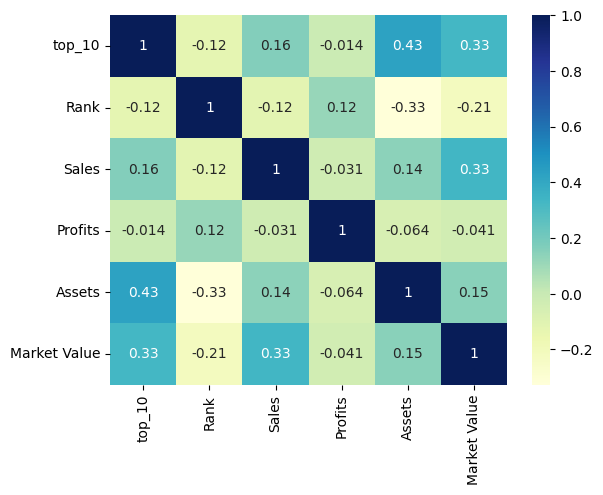

In [99]:
sns.heatmap(master_dataframe_only_numbers.corr(), annot = True, cmap = "YlGnBu")

In [108]:
#This is what we will use to see the correlation between the top 10
master_dataframe_only_numbers_top_10 = master_dataframe_only_numbers.drop("Rank", axis = 1)
master_dataframe_only_numbers_top_10

,top_10,Sales,Profits,Assets,Market Value
182,1,134.8,37.8,2813.50,237.30
183,1,113.1,30.6,2241.00,202.00
1031,1,108.2,21.3,2359.10,191.40
1032,1,147.4,13.6,685.30,243.70
1033,1,420.7,44.9,333.80,400.40
...,...,...,...,...,...
1995,0,5.35,0.4895,7.82,15.60
1996,0,15.62,-0.202,11.39,3.17
1997,0,3.34,0.0916,43.22,5.60
1998,0,0.556,0.1671,42.97,2.49


In [109]:
master_dataframe_only_numbers_top_10.corr()

,top_10,Sales,Profits,Assets,Market Value
top_10,1.000000,0.160486,-0.014089,0.428921,0.331329
Sales,0.160486,1.000000,-0.030931,0.142641,0.333511
Profits,-0.014089,-0.030931,1.000000,-0.064402,-0.040612
Assets,0.428921,0.142641,-0.064402,1.000000,0.148320
Market Value,0.331329,0.333511,-0.040612,0.148320,1.000000


<Axes: >

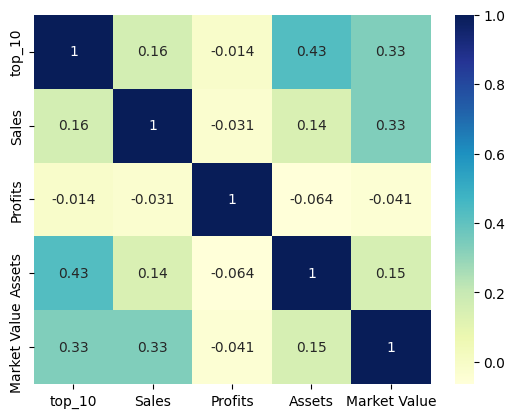

In [110]:
sns.heatmap(master_dataframe_only_numbers_top_10.corr(), annot = True, cmap = "YlGnBu")

In [111]:
#This is what we will use to see the correlation between the overall rank
master_dataframe_only_numbers_rank = master_dataframe_only_numbers.drop("top_10", axis = 1)
master_dataframe_only_numbers_rank

,Rank,Sales,Profits,Assets,Market Value
182,1,134.8,37.8,2813.50,237.30
183,2,113.1,30.6,2241.00,202.00
1031,3,108.2,21.3,2359.10,191.40
1032,4,147.4,13.6,685.30,243.70
1033,5,420.7,44.9,333.80,400.40
...,...,...,...,...,...
1995,1996,5.35,0.4895,7.82,15.60
1996,1996,15.62,-0.202,11.39,3.17
1997,1996,3.34,0.0916,43.22,5.60
1998,1999,0.556,0.1671,42.97,2.49


In [114]:
#Remember, these correlations are effectively inversed since, while in our eyes a lower rank is a higher correlation, Seaborn sees a higher rank as a higher correlation
master_dataframe_only_numbers_rank.corr()

,Rank,Sales,Profits,Assets,Market Value
Rank,1.000000,-0.117748,0.116782,-0.326876,-0.213262
Sales,-0.117748,1.000000,-0.030931,0.142641,0.333511
Profits,0.116782,-0.030931,1.000000,-0.064402,-0.040612
Assets,-0.326876,0.142641,-0.064402,1.000000,0.148320
Market Value,-0.213262,0.333511,-0.040612,0.148320,1.000000


<Axes: >

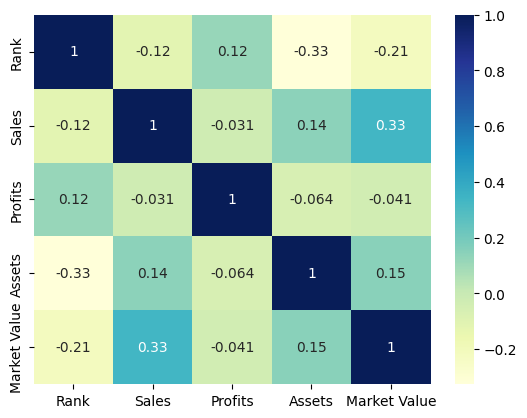

In [115]:
sns.heatmap(master_dataframe_only_numbers_rank.corr(), annot = True, cmap = "YlGnBu")

In [117]:
#Now, we're going to try and find a way to basically reverse all of the values of Rank in the entire dataframe so that we effectively reverse the correlation
#What we can probably due is go back to every individual dataframe, manually reverse the values there, and then put this master dataframe back together
master_dataframe_only_numbers_rank

,Rank,Sales,Profits,Assets,Market Value
182,1,134.8,37.8,2813.50,237.30
183,2,113.1,30.6,2241.00,202.00
1031,3,108.2,21.3,2359.10,191.40
1032,4,147.4,13.6,685.30,243.70
1033,5,420.7,44.9,333.80,400.40
...,...,...,...,...,...
1995,1996,5.35,0.4895,7.82,15.60
1996,1996,15.62,-0.202,11.39,3.17
1997,1996,3.34,0.0916,43.22,5.60
1998,1999,0.556,0.1671,42.97,2.49


In [132]:
df_global_2000_2013["Rank"] = df_global_2000_2013["Rank"].values[::-1]
df_global_2000_2015["Rank"] = df_global_2000_2015["Rank"].values[::-1]
df_global_2000_2017["Rank"] = df_global_2000_2017["Rank"].values[::-1]
df_global_2000_2020["Rank"] = df_global_2000_2020["Rank"].values[::-1]
df_global_2000_2021["Rank"] = df_global_2000_2021["Rank"].values[::-1]
df_global_2000_2023["Rank"] = df_global_2000_2023["Rank"].values[::-1]
df_global_2000_2013

,Rank,Company,Sales,Profits,Assets,Market Value,Country,top_10,publish_year
182,1999,ICBC,134.8,37.8,2813.5,237.3,China,1,2013
183,1999,China Construction Bank,113.1,30.6,2241.0,202.0,China,1,2013
1031,1998,JPMorgan Chase,108.2,21.3,2359.1,191.4,United States,1,2013
1032,1996,General Electric,147.4,13.6,685.3,243.7,United States,1,2013
1033,1996,Exxon Mobil,420.7,44.9,333.8,400.4,United States,1,2013
...,...,...,...,...,...,...,...,...,...
1982,5,San-Ai Oil,0.5,0.1,25.7,0.5,Japan,0,2013
666,4,UOL Group,0.9,0.7,7.8,4.2,Singapore,0,2013
322,3,Interconexion Electrica,2.4,0.2,14.6,5.8,Colombia,0,2013
1565,2,Old Republic International,5.0,-0.1,16.2,3.3,United States,0,2013


In [133]:
df_global_2000_2015

,Rank,Company,Country,Market Value,Sales,Profits,Assets,top_10,publish_year
159,1999,ICBC,China,215.6,148.7,42.7,3124.9,1,2015
160,1999,China Construction Bank,China,174.4,121.3,34.2,2449.5,1,2015
161,1998,Agricultural Bank of China,China,141.1,136.4,27.0,2405.4,1,2015
1433,1997,JPMorgan Chase,United States,229.7,105.7,17.3,2435.3,1,2015
1434,1996,Berkshire Hathaway,United States,309.1,178.8,19.5,493.4,1,2015
...,...,...,...,...,...,...,...,...,...
149,5,Cameco,Canada,9.5,2.4,0.3,7.6,0,2015
929,4,BMCE Bank,Morocco,4.6,1.5,0.1,26.3,0,2015
1994,3,Synovus Financial,United States,3.4,1.2,0.2,26.2,0,2015
875,2,UNY Group Holdings,Japan,1.4,10.7,0.1,8.8,0,2015


In [127]:
df_global_2000_2017

,Rank,Company,Country,Sales,Profits,Assets,Market Value,top_10,publish_year
0,2000,ICBC,China,151.400,42.000,3473.2,229.800,1,2017
1,1999,China Construction Bank,China,134.200,35.000,3016.6,200.500,1,2017
2,1998,Berkshire Hathaway,United States,222.900,24.100,620.9,409.900,1,2017
3,1997,JPMorgan Chase,United States,102.500,24.200,2513.0,306.600,1,2017
4,1996,Wells Fargo,United States,97.600,21.900,1943.4,274.400,1,2017
...,...,...,...,...,...,...,...,...,...
1995,5,BEKB-BCBE,Switzerland,0.555,0.131,27.9,1.700,0,2017
1996,4,Fastighets Balder,Sweden,0.630,0.639,10.2,3.800,0,2017
1997,3,Akamai Technologies,United States,2.300,0.316,4.4,10.100,0,2017
1998,2,Oita Bank,Japan,0.523,0.071,27.9,0.595,0,2017


In [128]:
df_global_2000_2020

,Rank,Company,Country,Sales,Profits,Assets,Market Value,top_10,publish_year
0,1999,ICBC,China,177.2,45.3,NaN,242.3,1,2020
1,1999,China Construction Bank,China,162.1,38.9,NaN,203.8,1,2020
2,1998,JPMorgan Chase,United States,142.9,30.0,NaN,291.7,1,2020
3,1995,Berkshire Hathaway,United States,254.6,81.4,817.7,455.4,1,2020
4,1995,Agricultural Bank of China,China,148.7,30.9,NaN,147.2,1,2020
...,...,...,...,...,...,...,...,...,...
1995,5,Founder Securities,China,1.4,115.0,18.6,8.3,0,2020
1996,4,Merlin Properties SOCIMI S.A,Spain,594.0,631.0,14.9,4.3,0,2020
1997,3,Heico,United States,2.1,371.0,3.1,11.8,0,2020
1998,2,W.P. Carey,United States,1.2,305.0,14.1,11.3,0,2020


In [129]:
df_global_2000_2021

,Rank,Company,Country,Sales,Profits,Assets,Market Value,top_10,publish_year
0,1999,ICBC,China,190.5,45.8,"4,914.7",249.5,1,2021
1,1999,JPMorgan Chase,United States,136.2,40.4,"3,689.3",464.8,1,2021
2,1997,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4,1,2021
3,1997,China Construction Bank,China,173.5,39.3,"4,301.7",210.4,1,2021
4,1996,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,"1,897.2",1,2021
...,...,...,...,...,...,...,...,...,...
1995,5,JTEKT,Japan,13.1,-34.9,12,3.5,0,2021
1996,4,Insurance Australia Group,Australia,5.4,-212,25,9.3,0,2021
1997,3,Sumec Corporation,China,13,79.2,7.1,1.3,0,2021
1998,2,Gold Fields,South Africa,3.9,718.1,7.5,8.9,0,2021


In [130]:
df_global_2000_2023

,Rank,Company,Country,Sales,Profits,Assets,Market Value,publish_year,top_10
0,1999,JPMorgan Chase,United States,179.930,41.8000,3744.30,399.59,2023,1
1,1999,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589.470,156.3600,660.99,2055.22,2023,1
2,1996,ICBC,China,216.770,52.4700,6116.82,203.01,2023,1
3,1996,China Construction Bank,China,203.080,48.2500,4977.48,172.99,2023,1
4,1996,Agricultural Bank of China,China,186.140,37.9200,5356.86,141.82,2023,1
...,...,...,...,...,...,...,...,...,...
1995,5,Alfa Laval,Sweden,5.350,0.4895,7.82,15.60,2023,0
1996,4,Gap,United States,15.620,-0.2020,11.39,3.17,2023,0
1997,3,Yes Bank,India,3.340,0.0916,43.22,5.60,2023,0
1998,2,BEKB-BCBE,Switzerland,0.556,0.1671,42.97,2.49,2023,0


In [135]:
#Now we can used this reversed rank master dataframe to get a more accurate correlation in regards to rank
reversed_rank_master_dataframe = pd.concat([df_global_2000_2013, df_global_2000_2015, df_global_2000_2017, df_global_2000_2020, df_global_2000_2021, df_global_2000_2023])
reversed_rank_master_dataframe

,Rank,Company,Sales,Profits,Assets,Market Value,Country,top_10,publish_year
182,1999,ICBC,134.8,37.8,2813.5,237.3,China,1,2013
183,1999,China Construction Bank,113.1,30.6,2241.0,202.0,China,1,2013
1031,1998,JPMorgan Chase,108.2,21.3,2359.1,191.4,United States,1,2013
1032,1996,General Electric,147.4,13.6,685.3,243.7,United States,1,2013
1033,1996,Exxon Mobil,420.7,44.9,333.8,400.4,United States,1,2013
...,...,...,...,...,...,...,...,...,...
1995,5,Alfa Laval,5.35,0.4895,7.82,15.6,Sweden,0,2023
1996,4,Gap,15.62,-0.202,11.39,3.17,United States,0,2023
1997,3,Yes Bank,3.34,0.0916,43.22,5.6,India,0,2023
1998,2,BEKB-BCBE,0.556,0.1671,42.97,2.49,Switzerland,0,2023


In [142]:
reversed_rank_master_dataframe['Assets'] = reversed_rank_master_dataframe['Assets'].apply(clean_and_convert)
reversed_rank_master_dataframe['Market Value'] = reversed_rank_master_dataframe['Market Value'].apply(clean_and_convert)
reversed_rank_master_dataframe

,Rank,Company,Sales,Profits,Assets,Market Value,Country,top_10,publish_year
182,1999,ICBC,134.8,37.8,2813.50,237.30,China,1,2013
183,1999,China Construction Bank,113.1,30.6,2241.00,202.00,China,1,2013
1031,1998,JPMorgan Chase,108.2,21.3,2359.10,191.40,United States,1,2013
1032,1996,General Electric,147.4,13.6,685.30,243.70,United States,1,2013
1033,1996,Exxon Mobil,420.7,44.9,333.80,400.40,United States,1,2013
...,...,...,...,...,...,...,...,...,...
1995,5,Alfa Laval,5.35,0.4895,7.82,15.60,Sweden,0,2023
1996,4,Gap,15.62,-0.202,11.39,3.17,United States,0,2023
1997,3,Yes Bank,3.34,0.0916,43.22,5.60,India,0,2023
1998,2,BEKB-BCBE,0.556,0.1671,42.97,2.49,Switzerland,0,2023


In [145]:
reversed_rank_master_dataframe_only_numbers = reversed_rank_master_dataframe.drop("Company", axis = 1)
reversed_rank_master_dataframe_only_numbers = reversed_rank_master_dataframe_only_numbers.drop("Country", axis = 1)
reversed_rank_master_dataframe_only_numbers = reversed_rank_master_dataframe_only_numbers.drop("publish_year", axis = 1)
reversed_rank_master_dataframe_only_numbers = reversed_rank_master_dataframe_only_numbers.drop("top_10", axis = 1)
reversed_rank_master_dataframe_only_numbers

,Rank,Sales,Profits,Assets,Market Value
182,1999,134.8,37.8,2813.50,237.30
183,1999,113.1,30.6,2241.00,202.00
1031,1998,108.2,21.3,2359.10,191.40
1032,1996,147.4,13.6,685.30,243.70
1033,1996,420.7,44.9,333.80,400.40
...,...,...,...,...,...
1995,5,5.35,0.4895,7.82,15.60
1996,4,15.62,-0.202,11.39,3.17
1997,3,3.34,0.0916,43.22,5.60
1998,2,0.556,0.1671,42.97,2.49


In [148]:
#This correlation should be much more accurate to the correlation regarding high rank
reversed_rank_master_dataframe_only_numbers.corr()

,Rank,Sales,Profits,Assets,Market Value
Rank,1.000000,0.117931,-0.116338,0.327037,0.213480
Sales,0.117931,1.000000,-0.030931,0.142641,0.333511
Profits,-0.116338,-0.030931,1.000000,-0.064402,-0.040612
Assets,0.327037,0.142641,-0.064402,1.000000,0.148320
Market Value,0.213480,0.333511,-0.040612,0.148320,1.000000


<Axes: >

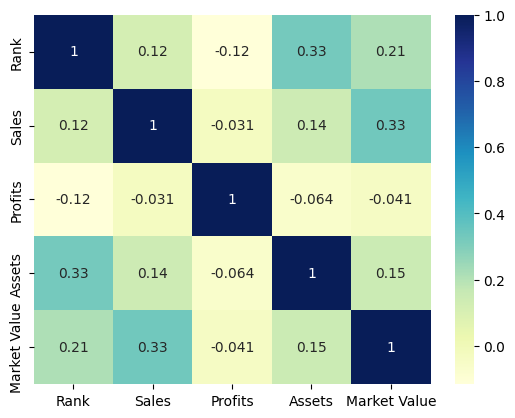

In [149]:
sns.heatmap(reversed_rank_master_dataframe_only_numbers.corr(), annot = True, cmap = "YlGnBu")

In [150]:
#Now that we finally have all of the correlations, master dataframes, and heatmaps in place, we can call everything all over again just for the sake of clarity

<Axes: >

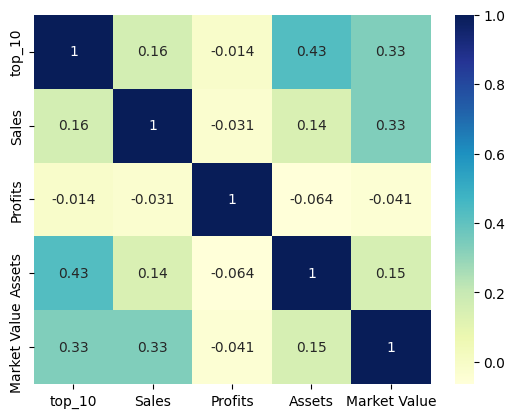

In [151]:
#Heatmap depicting correlation between placing in the top 10 of 2000 businesses and Sales, Profits, Assets, and overall Market Value (in Millions USD)
sns.heatmap(master_dataframe_only_numbers_top_10.corr(), annot = True, cmap = "YlGnBu")

<Axes: >

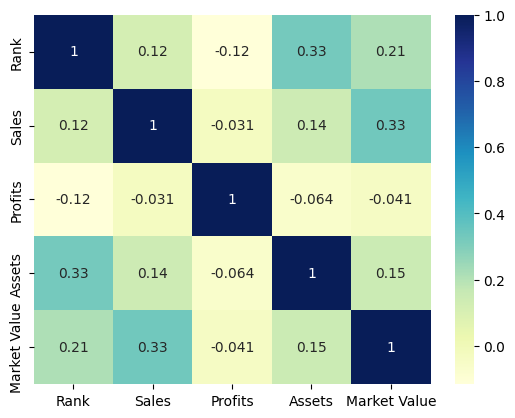

In [152]:
#Heatmap depicting correlation between having an overall high rank and Sales, Profits, Assets, and overall Market Value (in Millions USD)
sns.heatmap(reversed_rank_master_dataframe_only_numbers.corr(), annot = True, cmap = "YlGnBu")

In [153]:
#In terms of placing in the top 10, Assets and Market Value seem to be the two most important factors, with Sales coming in at a close third.
#In terms of overall rank, Assets and Market Value seem to also be the two most important factors, with Sales once again coming in at third.
#Profits for some reason seem to actually have a negative correlation with both overall rank and placing in the top 10.